In [10]:
tree = "dev"

## File I/O piplines

### Imports and Directory loading

In [11]:
import pathlib
import numpy as np
import librosa as rosa

In [12]:
fileiocheck = False
working_dir = ''
sub_dirs = []
paths = []
def load_dirs(tree:str) -> None:
    global working_dir,sub_dirs,paths
    if tree=="dev":
        working_dir = "sampling/"
        sub_dirs = []
        paths = [pathlib.Path(working_dir)]
    elif tree=="prod":
        working_dir = "audio/"
        sub_dirs = ['discomfort','hunger','pain']
        paths  = [pathlib.Path(working_dir+dir) for dir in sub_dirs]

In [13]:
# print(paths)

### AudIO Classes

In [14]:
from audio import AudIO

### Basic tests

In [15]:
load_dirs(tree="prod")
aio = AudIO(paths=paths)
audios = aio.getAllAudios()
print(audios)

[(array([-0.13064878, -0.17508066, -0.12394266, ..., -0.02248435,
       -0.04537858, -0.03746901], dtype=float32), 22050), (array([ 0.03939373,  0.0601788 ,  0.0495783 , ..., -0.01272201,
       -0.01395789, -0.00883116], dtype=float32), 22050), (array([0.17617908, 0.37023246, 0.46158892, ..., 0.03994034, 0.04031325,
       0.02263961], dtype=float32), 22050), (array([-0.02708368, -0.04876096, -0.0825662 , ..., -0.01657588,
       -0.0125604 , -0.00529859], dtype=float32), 22050), (array([-0.02731055, -0.04533367, -0.0485687 , ..., -0.00110541,
       -0.0050378 ,  0.00219741], dtype=float32), 22050), (array([ 0.03183655,  0.06648411,  0.08384795, ..., -0.00329806,
       -0.00341501, -0.00302807], dtype=float32), 22050), (array([ 0.0280803 ,  0.04545665,  0.03263286, ..., -0.00220236,
       -0.01191372, -0.01568297], dtype=float32), 22050), (array([ 0.02753239,  0.03066151,  0.0092322 , ..., -0.00324639,
       -0.02324604, -0.05107165], dtype=float32), 22050), (array([-0.02323911, 

In [16]:
load_dirs(tree="dev")
aio = AudIO(paths=paths)
audios = aio.getAllAudios()
print(audios)

[(array([0.05001208, 0.07300287, 0.07227496, ..., 0.03721377, 0.03015154,
       0.02150325], dtype=float32), 22050)]


In [17]:
load_dirs(tree=tree)
aio = AudIO(paths=paths)
audios = aio.getAllAudios()
print(audios)
fileiocheck = True

[(array([0.05001208, 0.07300287, 0.07227496, ..., 0.03721377, 0.03015154,
       0.02150325], dtype=float32), 22050)]


## Note: The Basic Pipline is ready:

### Follow these steps to load the audio files

- call the function `load_dirs(tree)` where you can use `prod` to get all audios or `dev` to use audios listed under `sampling` folder
- create `AudIO` obj pass `paths` variable (its been declared in FileIO in global scope)
- call `AudIO.getAllAudios()` to get a list of tuples `(y, sr)`

> y: np.ndarray [shape=(n,) or (…, n)]
> audio time series. Multi-channel is supported.
> 
> sr: number > 0 [scalar]
> sampling rate of y

### vars in global scope that can be used:
- paths -> paths to available audios
- audios -> paths to avaiable loaded audios

## MelSpectrumIO pipline

### Imports

In [18]:
import librosa as rosa
import matplotlib.pyplot as plt
import numpy as np

if not fileiocheck:
    raise Exception(BrokenPipeError("FileIO pipeline wasn't excecuted or failed the tests"))

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8160\3655960746.py:5: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  S = rosa.power_to_db(D, ref=np.max)


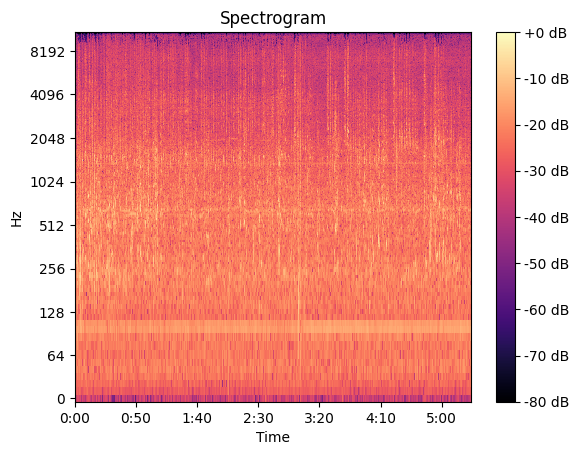

In [22]:
for audio in audios:
    y,sr = audio
    # Generate spectrogram
    D = rosa.stft(y)
    S = rosa.power_to_db(D, ref=np.max)

    # Visualize spectrogram
    rosa.display.specshow(S, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.show()

In [ ]:
# TODO: go over the research papers again and find the right audio duraction time and which specturm that has been used.. most probably mel log spec.

### MSIO classes

### Basic Tests